In [8]:
import yfinance as yf

# Extract Tesla stock data
tesla_data = yf.Ticker("TSLA")
tesla_stock_data = tesla_data.history(period="max")

# Display the first few rows of the dataset
print(tesla_stock_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of Tesla's financials page
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the correct table containing the revenue data
tables = soup.find_all('table', {'class': 'historical_data_table table'})
if not tables:
    raise ValueError("No table found on the webpage")

# Extract rows from the first table
rows = tables[0].find_all('tr')

# Debug: Print the number of rows found
print(f"Number of rows found: {len(rows)}")

# Extract the data
tesla_revenue = []
for row in rows[1:]:  # Skip the header row
    columns = row.find_all('td')
    # Debug: Print the number of columns in the current row
    print(f"Number of columns in row: {len(columns)}")
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        tesla_revenue.append([date, revenue])
    else:
        print(f"Skipping row due to unexpected number of columns: {row}")

# Create a DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=['Date', 'Revenue'])

# Convert Revenue to numeric, errors='coerce' will turn non-numeric values to NaN
tesla_revenue_df['Revenue'] = pd.to_numeric(tesla_revenue_df['Revenue'], errors='coerce')

# Drop rows with NaN values in Revenue
tesla_revenue_df.dropna(subset=['Revenue'], inplace=True)

# Display the first few rows of the DataFrame
print(tesla_revenue_df.head())


ValueError: No table found on the webpage

In [12]:
import yfinance as yf

# Extract GameStop stock data
gamestop_data = yf.Ticker("GME")
gamestop_stock_data = gamestop_data.history(period="max")

# Display the first few rows of the dataset
print(gamestop_stock_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of GameStop's financials page
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send a request to fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the correct table containing the revenue data
tables = soup.find_all('table', {'class': 'historical_data_table table'})
if not tables:
    raise ValueError("No table found on the webpage")

# Extract rows from the first table
rows = tables[0].find_all('tr')

# Debug: Print the number of rows found
print(f"Number of rows found: {len(rows)}")

# Extract the data
gamestop_revenue = []
for row in rows[1:]:  # Skip the header row
    columns = row.find_all('td')
    # Debug: Print the number of columns in the current row
    print(f"Number of columns in row: {len(columns)}")
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        gamestop_revenue.append([date, revenue])
    else:
        print(f"Skipping row due to unexpected number of columns: {row}")

# Create a DataFrame
gamestop_revenue_df = pd.DataFrame(gamestop_revenue, columns=['Date', 'Revenue'])

# Convert Revenue to numeric, errors='coerce' will turn non-numeric values to NaN
gamestop_revenue_df['Revenue'] = pd.to_numeric(gamestop_revenue_df['Revenue'], errors='coerce')

# Drop rows with NaN values in Revenue
gamestop_revenue_df.dropna(subset=['Revenue'], inplace=True)

# Display the first few rows of the DataFrame
print(gamestop_revenue_df.head())


ValueError: No table found on the webpage

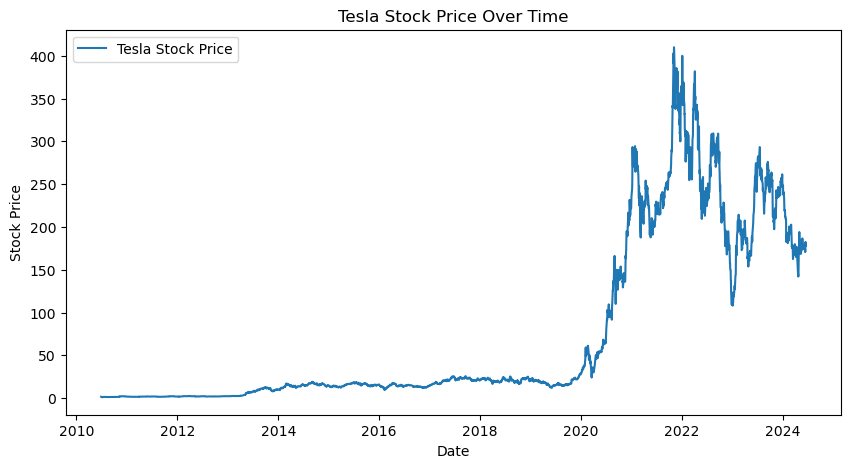

NameError: name 'tesla_revenue_df' is not defined

In [18]:
import matplotlib.pyplot as plt
import plotly.express as px

# Plot Tesla stock data using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(tesla_stock_data.index, tesla_stock_data['Close'], label='Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.legend()
plt.show()

# Plot Tesla revenue data using plotly
fig = px.bar(tesla_revenue_df, x='Date', y='Revenue', title='Tesla Revenue Over Time')
fig.show()


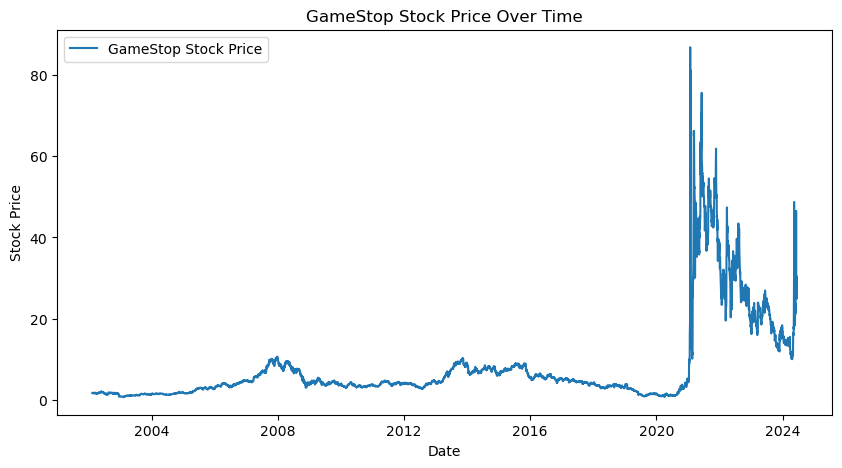

NameError: name 'gamestop_revenue_df' is not defined

In [19]:
# Plot GameStop stock data using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(gamestop_stock_data.index, gamestop_stock_data['Close'], label='GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('GameStop Stock Price Over Time')
plt.legend()
plt.show()

# Plot GameStop revenue data using plotly
fig = px.bar(gamestop_revenue_df, x='Date', y='Revenue', title='GameStop Revenue Over Time')
fig.show()
